<a href="https://colab.research.google.com/github/sahar7888/NLP_LLM_Projects/blob/main/Genre_classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

{'sequence': 'It was about eleven o’clock in the morning, mid October, with the sun not shining and a look of hard wet rain in the clearness of the foothills. I was wearing my powder-blue suit, with dark blue shirt, tie and display handkerchief, black brogues, black wool socks with dark blue clocks on them. I was neat, clean, shaved and sober, and I didn’t care who knew it. I was everything the well-dressed private detective ought to be. I was calling on four million dollars.',
 'labels': ['crime', 'history', 'fantasy'],
 'scores': [0.4789828658103943, 0.305549681186676, 0.2154674381017685]}

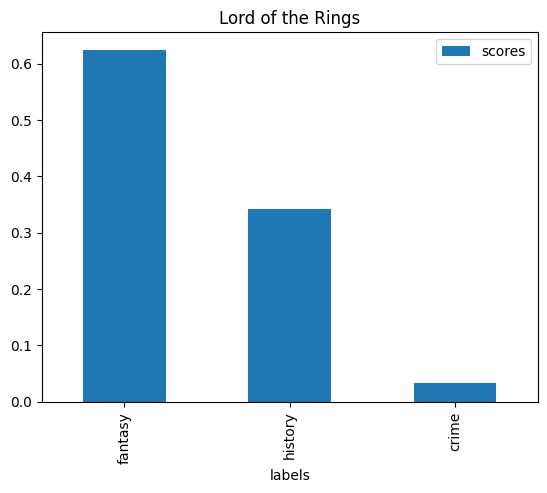

In [1]:
#%% packages
from transformers import pipeline
import pandas as pd

#%% Classifier
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
# %% Data Preparation
# first example: Raymond Chandler "The Big Sleep" (crime novel)
# second example: J.R.R. Tolkien "The Lord of the Rings" (fantasy novel)
# third example: Bill Bryson "A Short History of Nearly Everything"
documents = ["It was about eleven o’clock in the morning, mid October, with the sun not shining and a look of hard wet rain in the clearness of the foothills. I was wearing my powder-blue suit, with dark blue shirt, tie and display handkerchief, black brogues, black wool socks with dark blue clocks on them. I was neat, clean, shaved and sober, and I didn’t care who knew it. I was everything the well-dressed private detective ought to be. I was calling on four million dollars.",
             "When Mr. Bilbo Baggins of Bag End announced that he would shortly be celebrating his eleventy-first birthday with a party of special magnificence, there was much talk and excitement in Hobbiton.",
             "Welcome. And congratulations. I am delighted that you could make it. Getting here wasn’t easy, I know. In fact, I suspect it was a little tougher than you realize. To begin with, for you to be here now trillions of drifting atoms had somehow to assemble in an intricate and curiously obliging manner to create you. It’s an arrangement so specialized and particular that it has never been tried before and will only exist this once."
             ]
candidate_labels=["history", "crime", "fantasy"]
#%% classify documents
res = classifier(documents, candidate_labels = candidate_labels)

#%% visualize results
pd.DataFrame(res[1]).plot.bar(x='labels', y='scores', title='Lord of the Rings')
# %% flag multiple labels
classifier(documents[0], candidate_labels = candidate_labels, multi_label=False)
# %%

In [2]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 5.9 MB/s 

In [15]:
%%writefile app.py

import gradio as gr
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt
import tempfile

# Initialize the zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")



# Define the classification function
def classify_text(document, labels):
    candidate_labels = labels.split(", ")
    res = classifier(document, candidate_labels=candidate_labels, multi_label=False)
    df = pd.DataFrame(res)

    # Create a temporary file to save the plot
    with tempfile.NamedTemporaryFile(delete=False, suffix=".png") as tmpfile:
        df.plot.bar(x='labels', y='scores', legend=False)
        plt.title("Classification Results")
        plt.xlabel("Labels")
        plt.ylabel("Scores")
        plt.tight_layout()
        plt.savefig(tmpfile.name)
        plt.close()

    return df, tmpfile.name

# Define the example inputs and outputs
examples = [
    ["It was about eleven o’clock in the morning, mid October, with the sun not shining and a look of hard wet rain in the clearness of the foothills. I was wearing my powder-blue suit, with dark blue shirt, tie and display handkerchief, black brogues, black wool socks with dark blue clocks on them. I was neat, clean, shaved and sober, and I didn’t care who knew it. I was everything the well-dressed private detective ought to be. I was calling on four million dollars.",
     "history, crime, fantasy"],
]

# Create Gradio interface
interface = gr.Interface(
    fn=classify_text,
    inputs=[
        gr.Textbox(lines=10, label="Document"),
        gr.Textbox(lines=1, label="Candidate Labels (comma-separated)")
    ],
    outputs=[
        gr.Dataframe(type ="pandas",label="Classification Scores"),
        gr.Image(type="numpy", label="Classification Bar Plot")
    ],
    title="Text Genre Classification",
    description="Classify text into specified labels using zero-shot classification. Provide a document and candidate labels separated by commas.",
    examples=examples
)

# Launch the Gradio app
interface.launch(debug=True)



Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://7585cb5dbb7eec2051.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7863 <> https://7585cb5dbb7eec2051.gradio.live


In [18]:
%%writefile requirements.txt
gradio == 3.45.0
transformers==4.41.1
torch==2.3.0
pandas==2.2.2
matplotlib==3.9.0
tempfile==5.1.0

Writing requirements.txt
